### Start by importing libraries and files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_housing_prices = pd.read_csv('housing_prices_train_data.csv')

In [4]:
df_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_housing_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# so I can take a look at all aspects of the df
pd.set_option("display.max_rows", None)

In [7]:
df_housing_prices.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Making a new column to indicate the total baths a property has.

In [8]:
df_housing_prices['TotalBath'] = df_housing_prices['BsmtFullBath'] + df_housing_prices['BsmtHalfBath'] +df_housing_prices['FullBath'] + df_housing_prices['HalfBath']


### Assessing dependent variable, SalePrice

In [9]:
df_housing_prices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

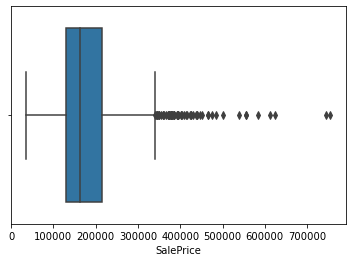

In [10]:
sns.boxplot(x='SalePrice', data=df_housing_prices)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

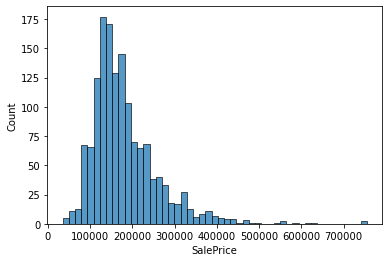

In [11]:
sns.histplot(x='SalePrice', data = df_housing_prices)

In [12]:
# took out outliers based on boxplot outlier indication
# decreased total dataset by 54
outliers = df_housing_prices[df_housing_prices['SalePrice'] > 350000]
len(outliers)

54

In [13]:
# created new df excluding outliers
df_lessthen350k = df_housing_prices[df_housing_prices['SalePrice'] <= 350000]

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

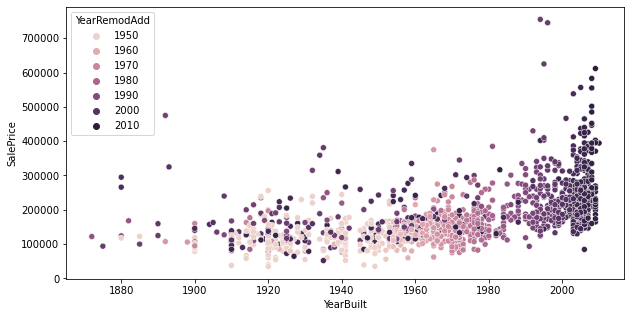

In [14]:
# scatterplot with outliers included
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_housing_prices)

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

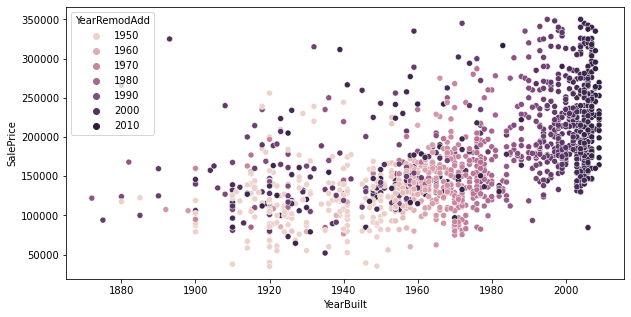

In [15]:
# scatterplot without outliers
plt.figure(figsize=(10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='YearRemodAdd', data= df_lessthen350k)

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

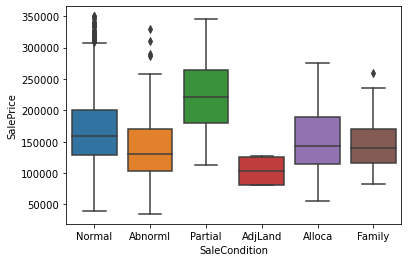

In [16]:
sns.boxplot(x='SaleCondition', y='SalePrice', data = df_lessthen350k)

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

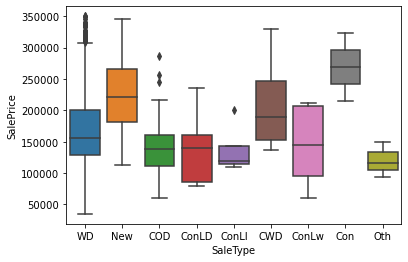

In [17]:
sns.boxplot(x='SaleType', y='SalePrice', data = df_lessthen350k)

### Assessing which variables could be potential predictors of SalePrice

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBath
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.003105
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.176610
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.201804
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.184407
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.529906
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.149461
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.507498
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.426079
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.330295
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.419852


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Housing Prices Features')

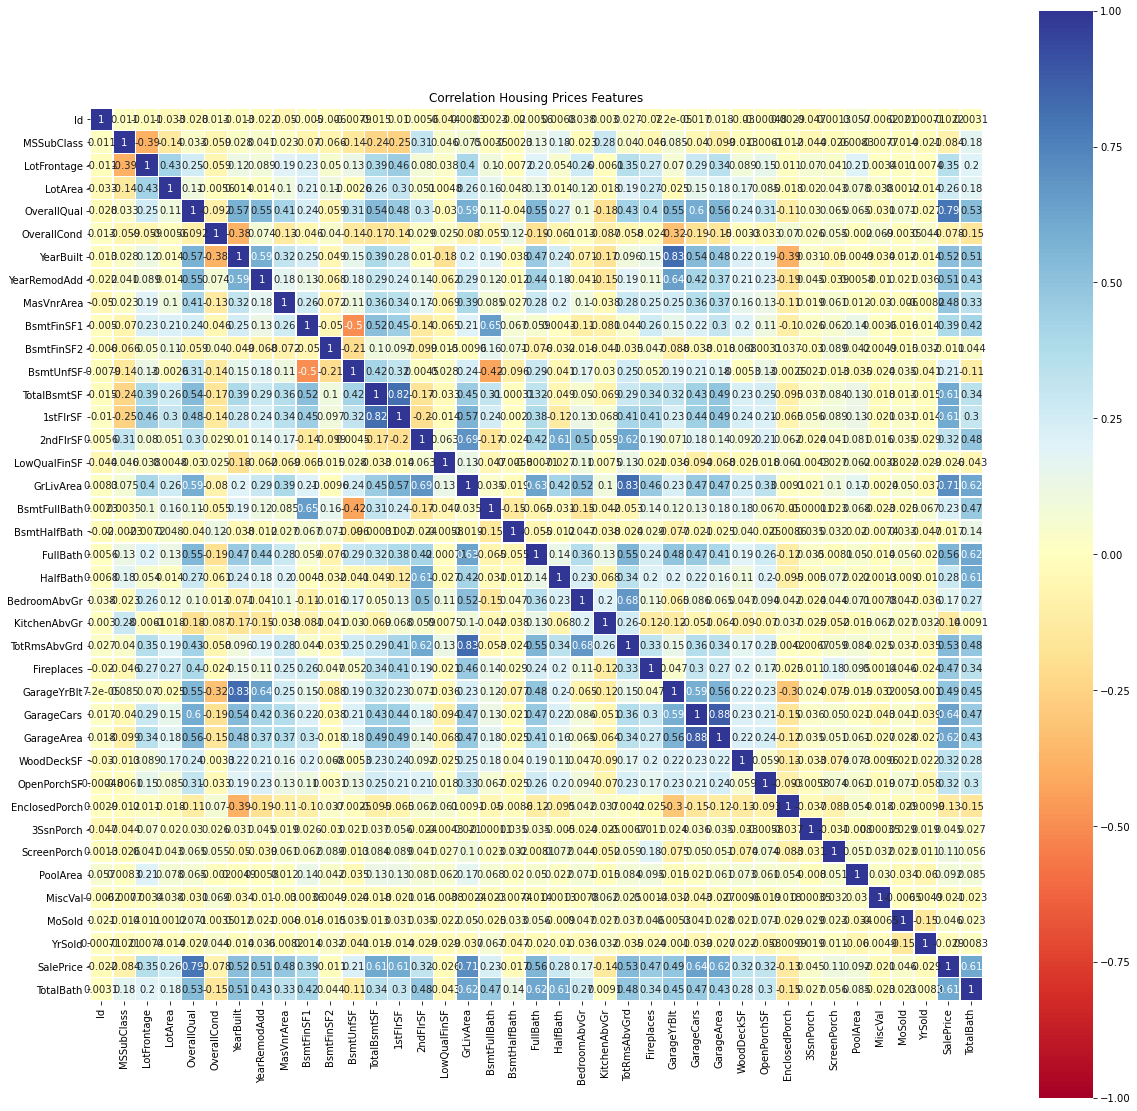

In [18]:
columns = df_housing_prices.columns
df_housing_prices_corr = df_housing_prices[columns]
df_housing_prices_corr.corr()

corrmat = df_housing_prices_corr.corr()

f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

plt.show()

The above correlation plot is a bit messy, I took out the features that had the most correlation to have a closer look.


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
LotFrontage,1.000000,0.426095,0.251646,0.123349,0.088866,0.193458,0.233633,0.132644,0.392075,0.457181,...,0.198769,0.053532,0.263170,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972
LotArea,0.426095,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,...,0.126031,0.014259,0.119690,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774
OverallQual,0.251646,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,...,0.550600,0.273458,0.101676,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819
YearBuilt,0.123349,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,...,0.468271,0.242656,-0.070651,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686
YearRemodAdd,0.088866,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,...,0.439046,0.183331,-0.040581,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298
MasVnrArea,0.193458,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,...,0.276833,0.201444,0.102821,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703
BsmtFinSF1,0.233633,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,...,0.058543,0.004262,-0.107355,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761
BsmtUnfSF,0.132644,-0.002618,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,...,0.288886,-0.041118,0.166643,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005
TotalBsmtSF,0.392075,0.260833,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,...,0.323722,-0.048804,0.050450,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264
1stFlrSF,0.457181,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,...,0.380637,-0.119916,0.127401,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Housing Prices Features')

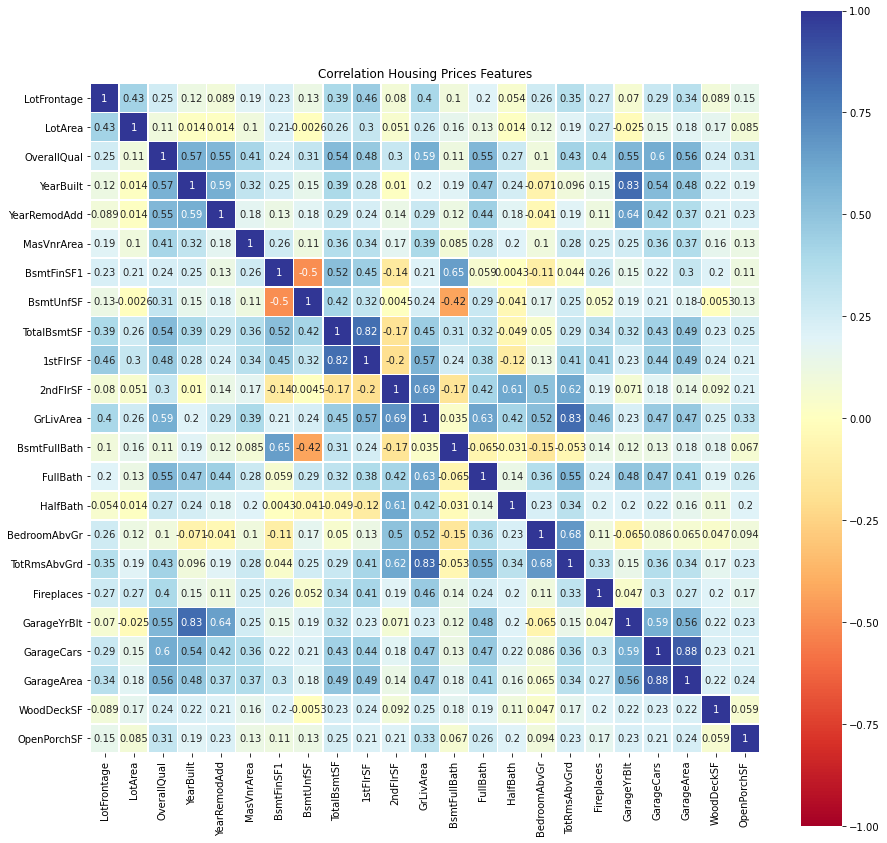

In [19]:
columns = ['LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
          'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']
df_housing_prices_corr = df_housing_prices[columns]
df_housing_prices_corr.corr()

corrmat = df_housing_prices_corr.corr()

f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation Housing Prices Features')

plt.show()

I took a look at a few of the categorical variables I thought might have a correlation to SalePrice as the plot above does not include these.

In [20]:
# H0 is that neighborhood and salesprice are not correlated
salepricetoneighborhood = df_lessthen350k.groupby('Neighborhood')['SalePrice'].apply(list)
# this very small P-value states that these are correlated
anovaresult = f_oneway(*salepricetoneighborhood)
print('P-value for anova is: ', anovaresult[1])

P-value for anova is:  3.186414312890074e-214


In [21]:
# H0 is that salecondition and salesprice are not correlated
salepricecondition = df_lessthen350k.groupby('SaleCondition')['SalePrice'].apply(list)
# this very small P-value states that these are correlated
anovaresult = f_oneway(*salepricecondition)
print('P-value for anova is: ', anovaresult[1])

P-value for anova is:  1.5671871144894734e-23


### Based off of the correlation plot and the above anova test, I am going to assess neighborhood, overall quality, and year remodeled as possible sale price predictors.

In [22]:
df_housing_prices['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [23]:
df_lessthen350k[['SalePrice','Neighborhood']].groupby('Neighborhood').describe()

SalePrice                                                   \
                 count           mean           std       min       25%   
Neighborhood                                                              
Blmngtn           17.0  194870.882353  30393.229219  159895.0  174000.0   
Blueste            2.0  137500.000000  19091.883092  124000.0  130750.0   
BrDale            16.0  104493.750000  14330.176493   83000.0   91000.0   
BrkSide           58.0  124834.051724  40348.689270   39300.0  100500.0   
ClearCr           28.0  212565.428571  50231.538993  130000.0  183750.0   
CollgCr          148.0  195175.851351  45660.170260  110000.0  151625.0   
Crawfor           48.0  200192.937500  56068.783527   90350.0  158125.0   
Edwards          100.0  128219.700000  43208.616459   58500.0  101500.0   
Gilbert           78.0  190487.256410  29383.868844  141000.0  174000.0   
IDOTRR            37.0  100123.783784  33376.710117   34900.0   81000.0   
MeadowV           17.0   98576.470588  23491.049610   75000.0   83500.0   
Mitchel           49.0  156270.122449  36486.625334   84500.0  131000.0   
NAmes            225.0  145847.080000  33075.345450   87500.0  127500.0   
NPkVill            9.0  142694.444444   9377.314529  127500.0  140000.0   
NWAmes            73.0  189050.068493  37172.218106   82500.0  165150.0   
NoRidge           33.0  288200.242424  38613.672134  190000.0  260400.0   
NridgHt           53.0  265235.264151  54360.770637  154000.0  214000.0   
OldTown          112.0  125129.098214  41279.864558   37900.0  105675.0   
SWISU             25.0  142591.360000  32622.917679   60000.0  128000.0   
Sawyer            74.0  136793.135135  22345.129157   62383.0  127250.0   
SawyerW           59.0  186555.796610  55651.997820   76000.0  145500.0   
Somerst           84.0  221295.095238  49894.831303  144152.0  177375.0   
StoneBr           16.0  239312.500000  48426.877868  170000.0  202875.0   
Timber            35.0  230914.371429  53852.997496  137500.0  185350.0   
Veenker           10.0  224150.000000  56620.103418  162500.0  182875.0   

                                            
                   50%       75%       max  
Neighborhood                                
Blmngtn       191000.0  213490.0  264561.0  
Blueste       137500.0  144250.0  151000.0  
BrDale        106000.0  118000.0  125000.0  
BrkSide       124300.0  141175.0  223500.0  
ClearCr       200250.0  242225.0  328000.0  
CollgCr       195950.0  224900.0  313000.0  
Crawfor       195550.0  234250.0  335000.0  
Edwards       121750.0  145225.0  320000.0  
Gilbert       181000.0  194125.0  320000.0  
IDOTRR        103000.0  120500.0  169500.0  
MeadowV        88000.0  115000.0  151400.0  
Mitchel       153500.0  171000.0  271000.0  
NAmes         140000.0  158000.0  345000.0  
NPkVill       146000.0  148500.0  155000.0  
NWAmes        182900.0  205000.0  299800.0  
NoRidge       290000.0  315750.0  350000.0  
NridgHt       275000.0  317000.0  350000.0  
OldTown       118250.0  139250.0  325000.0  
SWISU         139500.0  160000.0  200000.0  
Sawyer        135000.0  149462.5  190000.0  
SawyerW       179900.0  222500.0  320000.0  
Somerst       223500.0  252169.5  340000.0  
StoneBr       237750.0  275750.0  325000.0  
Timber        224500.0  275606.5  335000.0  
Veenker       206000.0  263875.0  324000.0

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'ClearCr'),
 Text(19, 0, 'NPkVill'),
 Text(20, 0, 'StoneBr'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

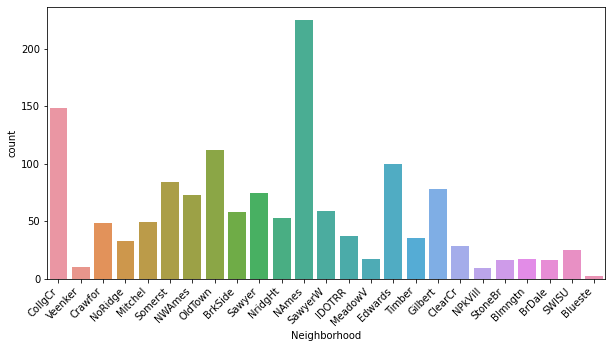

In [24]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Neighborhood', data=df_lessthen350k)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'ClearCr'),
 Text(19, 0, 'NPkVill'),
 Text(20, 0, 'StoneBr'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

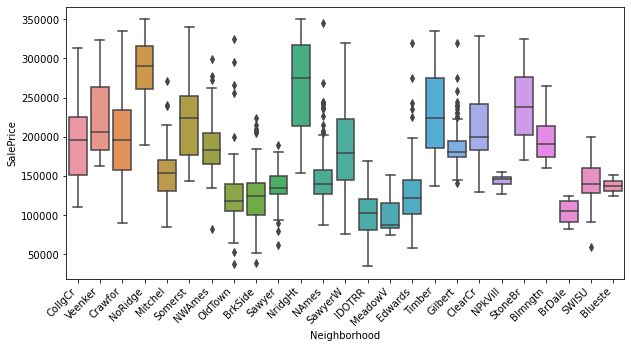

In [25]:
plt.figure(figsize=(10,5))
chart = sns.boxplot(x='Neighborhood', y='SalePrice', data=df_lessthen350k)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

It does look like housing prices can be an indication of saleprice. Comparing it to the full dataset, you can see similar findings but the outliers make it harder to decipher the main spread of the data. 

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'StoneBr'),
 Text(19, 0, 'ClearCr'),
 Text(20, 0, 'NPkVill'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

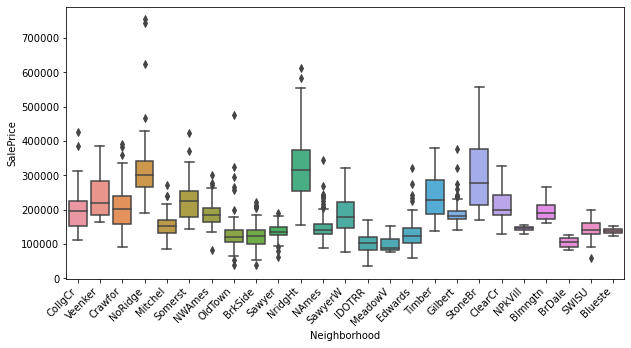

In [26]:
plt.figure(figsize=(10,5))
chart = sns.boxplot(x='Neighborhood', y='SalePrice', data=df_housing_prices)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

<Figure size 720x360 with 0 Axes>

[Text(0, 0, 'Veenker'),
 Text(1, 0, 'StoneBr'),
 Text(2, 0, 'CollgCr'),
 Text(3, 0, 'NridgHt'),
 Text(4, 0, 'OldTown'),
 Text(5, 0, 'NoRidge'),
 Text(6, 0, 'Timber'),
 Text(7, 0, 'Crawfor'),
 Text(8, 0, 'Somerst'),
 Text(9, 0, 'Gilbert')]

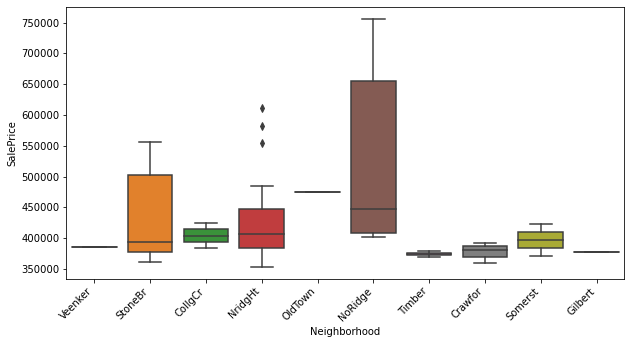

In [27]:
# wanted to look at which neighborhoods had the outlier prices in them
plt.figure(figsize=(10,5))
chart = sns.boxplot(x='Neighborhood', y='SalePrice', data=outliers)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


In [28]:
df_lessthen350k[['YearRemodAdd','SalePrice']].groupby('YearRemodAdd').describe()

SalePrice                                                   \
                 count           mean           std       min       25%   
YearRemodAdd                                                              
1950             178.0  117463.056180  39306.143137   34900.0   91850.0   
1951               4.0  129975.000000  18694.094433  102000.0  128925.0   
1952               5.0  110398.600000  42510.180073   55993.0   82000.0   
1953              10.0  147640.000000  48205.075805   79900.0  113250.0   
1954              14.0  121142.857143  19492.038386   93000.0  110250.0   
1955               9.0  124511.111111  18922.568830   82000.0  118000.0   
1956              10.0  124235.000000  14800.188625   97000.0  115875.0   
1957               9.0  132656.444444  26324.094928   84000.0  112500.0   
1958              15.0  128386.666667  30081.291449   60000.0  112250.0   
1959              18.0  136054.555556  21141.132963   80000.0  127862.5   
1960              12.0  145212.500000  32542.295031   79500.0  126875.0   
1961               8.0  131881.250000  18686.892608   98600.0  126000.0   
1962              14.0  145471.428571  22575.937789  101800.0  133000.0   
1963              13.0  139765.384615  18992.842782  110000.0  132250.0   
1964              11.0  159218.181818  24191.809283  115000.0  151500.0   
1965              18.0  131115.722222  34468.516444   62383.0  110000.0   
1966              15.0  149914.666667  49600.485433   76500.0  117500.0   
1967              12.0  131458.333333  25323.774612   90000.0  122750.0   
1968              17.0  153095.882353  35952.917660  108000.0  130000.0   
1969              14.0  157297.071429  35230.234132  108000.0  135950.0   
1970              26.0  139367.307692  47570.555898   75000.0  106000.0   
1971              18.0  120230.555556  30459.245379   85400.0   92875.0   
1972              20.0  127330.000000  24705.515046   75500.0  116625.0   
1973              11.0  139081.818182  52130.064611   83000.0   95500.0   
1974               7.0  159357.142857  17787.435373  136000.0  144750.0   
1975              10.0  174652.400000  52842.418902  110000.0  134000.0   
1976              30.0  159868.500000  38985.613066   85000.0  132875.0   
1977              25.0  158702.000000  29255.243405   82500.0  140000.0   
1978              16.0  158362.500000  30774.792174  112000.0  146750.0   
1979              10.0  150357.200000  46540.244138   99500.0  121473.0   
1980              12.0  154812.500000  43008.340232  110500.0  128687.5   
1981               8.0  184425.000000  49689.054558  110000.0  168000.0   
1982               7.0  121271.428571  25671.625990   84500.0  104750.0   
1983               5.0  136880.000000   6600.909028  131000.0  131400.0   
1984               7.0  184928.571429  44422.618649  125000.0  152500.0   
1985               9.0  167611.111111  52129.512861  112000.0  120000.0   
1986               5.0  189400.000000  27125.633633  168000.0  170000.0   
1987               9.0  190322.222222  60431.444170  122000.0  140000.0   
1988               9.0  190533.333333  35192.648380  139000.0  175000.0   
1989              11.0  198318.181818  44741.073259  143500.0  170500.0   
1990              15.0  200042.000000  74875.985298  109900.0  145225.0   
1991              14.0  184714.285714  49876.475990  107500.0  152000.0   
1992              17.0  171611.764706  41609.161887   93500.0  147000.0   
1993              17.0  194876.705882  58920.395233  105000.0  167500.0   
1994              22.0  217231.818182  60875.566968  125000.0  180250.0   
1995              30.0  188560.000000  72826.835713  100000.0  135750.0   
1996              32.0  170942.968750  54360.239277   81000.0  138612.5   
1997              24.0  207303.750000  59065.179458  108000.0  174500.0   
1998              35.0  202515.714286  57439.360315   79900.0  163000.0   
1999              30.0  203667.266667  52844.649806  127500.0  176850.0   
2000              55.0  186388.272727 

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

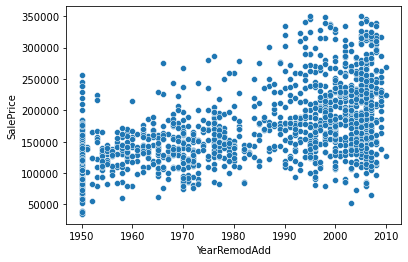

In [29]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df_lessthen350k)

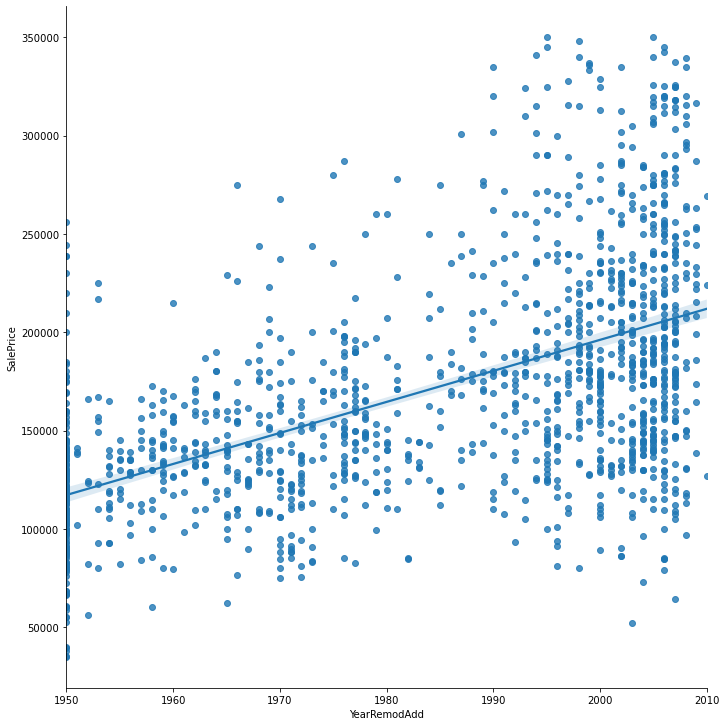

In [30]:
sns.lmplot(data = df_lessthen350k, x='YearRemodAdd', y = 'SalePrice', height = 10)

There is an upward trend that shows the on average, the newer the renovation, the higher the sale price is. 

<Figure size 720x360 with 0 Axes>

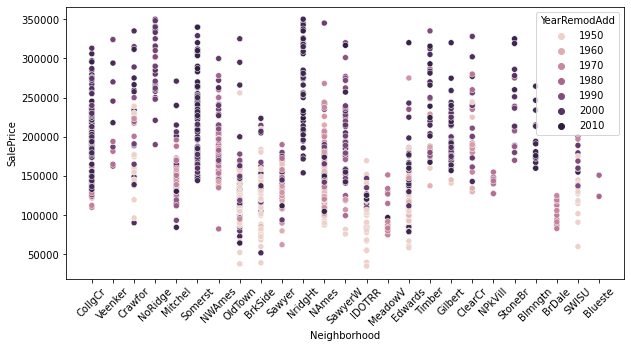

In [31]:
#fix x labels
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Neighborhood', y='SalePrice', hue='YearRemodAdd', data=df_lessthen350k)
ax.tick_params(axis='x', rotation = 45)

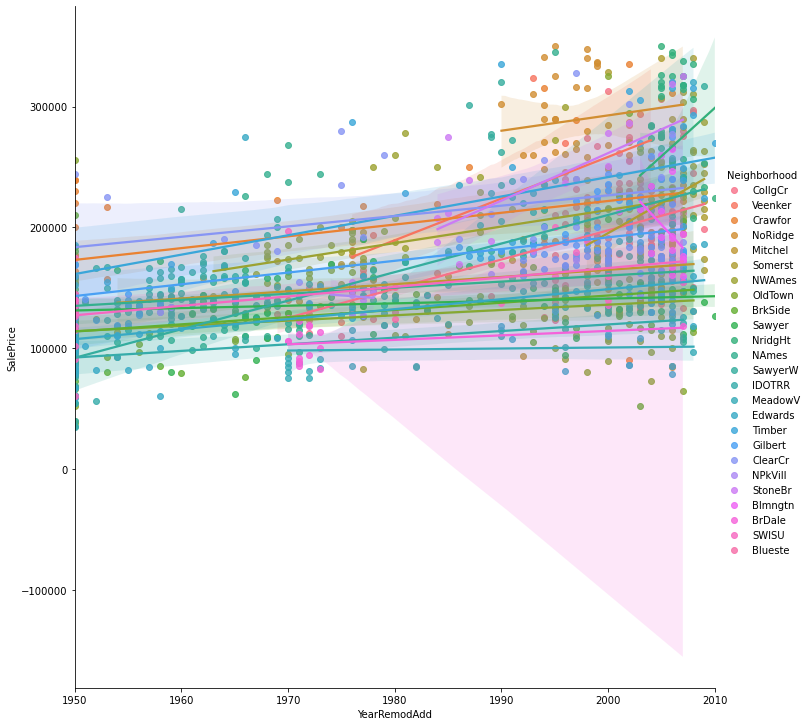

In [32]:
sns.lmplot(x='YearRemodAdd', y='SalePrice', hue='Neighborhood', data=df_lessthen350k, height = 10)

This plot is a bit messy but it does show that on average, the newer the renovation, the higher the sale prive per neighborhood. It is interesting to see that this is not true for every neighborhood, as there are some negative slopes. More analysis is needed to further explore this. 

In [33]:
df_lessthen350k['OverallQual'].value_counts()

5     397
6     374
7     317
8     149
4     116
9      23
3      20
10      5
2       3
1       2
Name: OverallQual, dtype: int64

In [34]:
df_lessthen350k[['OverallQual','SalePrice']].groupby('OverallQual').describe()

SalePrice                                                   \
                count           mean           std       min       25%   
OverallQual                                                              
1                 2.0   50150.000000  15344.217152   39300.0   44725.0   
2                 3.0   51770.333333  14254.200796   35311.0   47655.5   
3                20.0   87473.750000  24688.567399   37900.0   75500.0   
4               116.0  108420.655172  29022.003886   34900.0   88000.0   
5               397.0  133523.347607  27107.330927   55993.0  118000.0   
6               374.0  161603.034759  36090.182933   76000.0  139125.0   
7               317.0  206632.709779  42446.672490   82500.0  179400.0   
8               149.0  258656.120805  45785.452232  122000.0  230500.0   
9                23.0  312765.956522  27942.390354  239000.0  313906.5   
10                5.0  263450.000000  84163.976855  160000.0  184750.0   

                                           
                  50%       75%       max  
OverallQual                                
1             50150.0   55575.0   61000.0  
2             60000.0   60000.0   60000.0  
3             86250.0   97500.0  139600.0  
4            108000.0  125500.0  256000.0  
5            133000.0  147000.0  228950.0  
6            160000.0  181000.0  277000.0  
7            200100.0  230000.0  341000.0  
8            261500.0  287090.0  350000.0  
9            319900.0  327450.0  350000.0  
10           310000.0  325000.0  337500.0

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

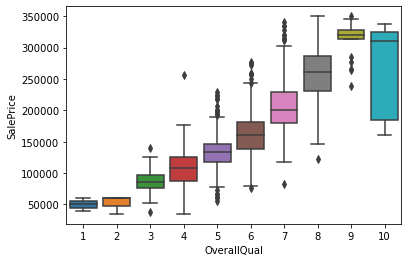

In [35]:
sns.boxplot(x='OverallQual',y='SalePrice', data = df_lessthen350k)

<Figure size 720x360 with 0 Axes>

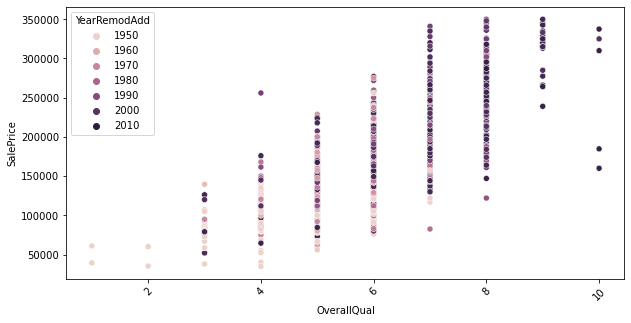

In [36]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='OverallQual', y='SalePrice', hue='YearRemodAdd', data=df_lessthen350k)
ax.tick_params(axis='x', rotation = 45)

<Figure size 720x360 with 0 Axes>

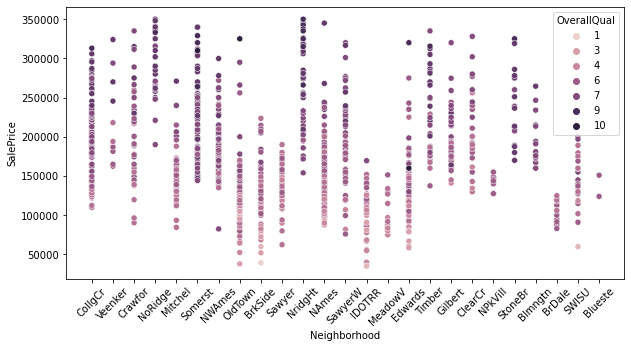

In [37]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='Neighborhood', y='SalePrice', hue='OverallQual', data=df_lessthen350k)
ax.tick_params(axis='x', rotation = 45)

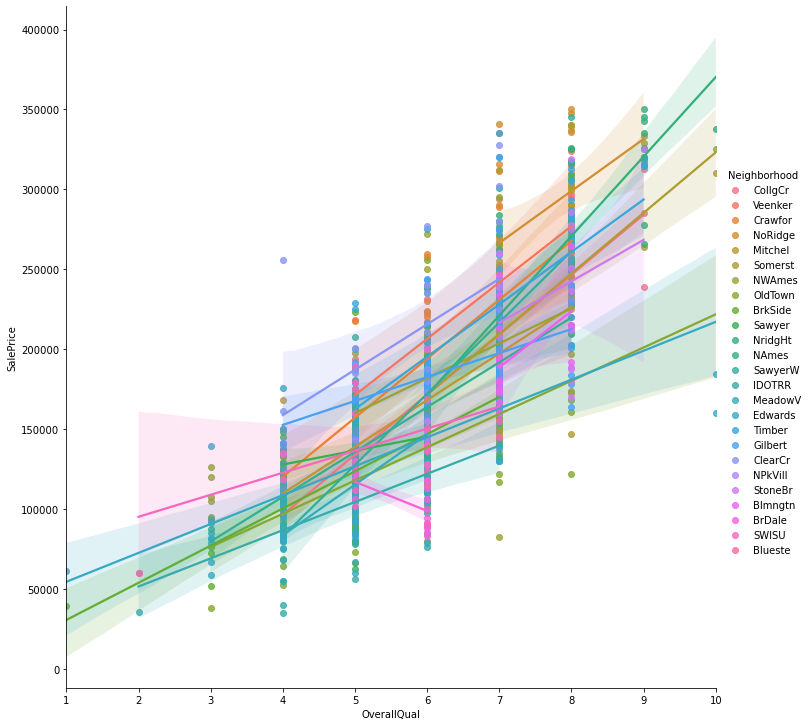

In [38]:
sns.lmplot(x='OverallQual', y='SalePrice', hue='Neighborhood', data=df_lessthen350k, height = 10)


On average, the higher the quality home, the higher the selling price. 

### Min-max scaling

In [39]:
#pip install -U scikit-learn

In [40]:
#conda install -c scikit-learn

In [51]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [55]:
sale_quality_scaled = scaler.fit_transform(df_lessthen350k[['SalePrice']])

In [56]:
sale_quality_scaled

array([[0.55093621],
       [0.46524913],
       [0.59854015],
       ...,
       [0.73500476],
       [0.3402888 ],
       [0.35734687]])

### Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler_2 = StandardScaler()

In [47]:
standard_sale_scaled = scaler_2.fit_transform(df_lessthen350k[['SalePrice']])

In [48]:
standard_sale_scaled

array([[ 0.6195948 ],
       [ 0.17215093],
       [ 0.86817473],
       ...,
       [ 1.58077054],
       [-0.48037139],
       [-0.39129692]])

As standard scaling is less affected by outliers, I wanted to compare the above scaling with scaling of the full dataset.

In [49]:
standard_sale_scaled = scaler_2.fit_transform(df_housing_prices[['SalePrice']])

In [50]:
standard_sale_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

It is different but hard to tell if it would drastically affect the model. 